In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import ode

In [2]:
w = []
graf = []

#Se definen las ecuaciones diferenciales y los parámetros
def f(t, z, p):
    
    #Parámetros de la integral
    δ, α, β, γ, ω = p                           
    
    #Parámetros de integración
    x, y = z
    
    #Función a integrar
    f = [y, - δ*y - α*x - β*x**3 + γ*math.cos(ω*t)]

    return f

In [3]:
solver = ode(f)
solver.set_integrator('dopri5')

#Especificamos valores de β para obtener 4 movimientos
βi = [-0.003, 0.000, 0.010, 0.040]

for j in range (0, len(βi)):
   
    #Arreglos para cada w y x
    wi = []
    grafi = []
    for i in range(0, 200):
        
        γ = 1.0
        α = 1.0        
        δ = 0.1
        ω = i*0.01
        β = βi[j]
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
        t0 = 0.0
        z0 = [1.0, 0]
        solver.set_initial_value(z0, t0)
        
        t1 = 40
        n = 400
        t = np.linspace(t0, t1, n)
        sol = np.empty((n, 2))
        sol[0] = z0
        
        k = 1
        
        while solver.successful() and solver.t < t1:
            solver.integrate(t[k])
            sol[k] = solver.y
            k += 1
        x = sol[:,0]
        wi.append(ω)
        grafi.append(max(abs(x)))
        
    w.append(wi)
    graf.append(grafi)

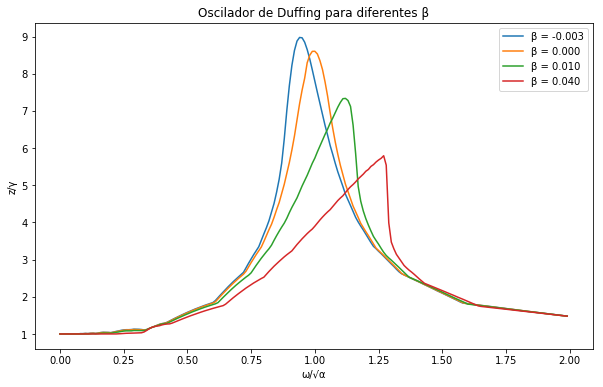

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(w[0], graf[0], label = "β = -0.003")
plt.plot(w[1], graf[1], label = "β = 0.000")
plt.plot(w[2], graf[2], label = "β = 0.010")
plt.plot(w[3], graf[3], label = "β = 0.040")
plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.title("Oscilador de Duffing para diferentes β")
plt.legend()
plt.savefig("betas.png")
plt.show()

In [5]:
w1 = []
graf1 = []

for i in range(0, 200):
    
    γ = 1.0
    α = 1.0        
    δ = 0.1
    ω = i*0.01
    β = 0.04

    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].
    t1 = 40
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0

    k = 1

    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1

    x = sol[:,0]

    w1.append(ω)
    graf1.append(max(abs(x)))

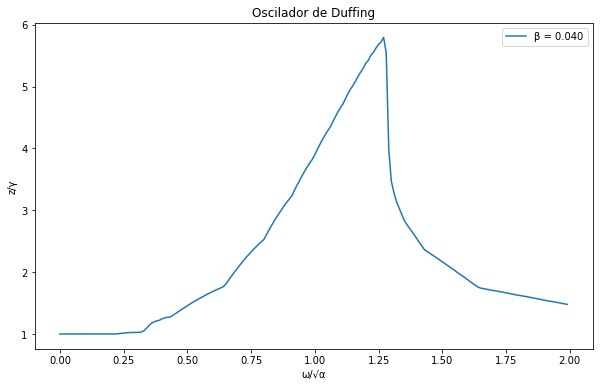

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(w1, graf1, label = "β = 0.040")
plt.xlabel('ω/√α')
plt.ylabel("z/γ")
plt.title("Oscilador de Duffing")
plt.legend()
plt.savefig("uni.png")
plt.show()